In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
# Conv2D: 합성곱 레이어, 특성 맵에 대해 필터를 적용하여 다양한 특징을 추출 => 입력 이미지에 대해 필터를 이동시키면서 합성곱 연산을 수행
# MaxPooling2D : 최대 풀링 레이어, 특성 맵을 격자로 나눈 후 각 격자 영역에서 최대값을 추출하여 출력 => 데이터의 크기를 줄이고 중요한 특성을 강조
# Flatten : 다차원의 입력을 받아서 1차원으로 변환, 
# Dense : 완전 연결 레이어, 입력 데이터를 받아서 가중치와 곱한 후 편향을 더하여 출력
# BatchNormalization : 배치 정규화 레이어 (정규분포(평균이 0이고 표준편차가 1) 형태로 만들어 준다) => 과적합 방지, 기울기 소실 방지, 연산 빨라짐
# Dropout : 학습 과정에서 임의의 유닛을 제거 => 과적합 방지
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, AveragePooling2D

# L1 규제 : 가중치 w들의 절대값 합계를 비용 함수에 추가
# L2 규제 : 모든 가중치 w들의 제곱합을 비용 함수에 추가
from tensorflow.keras.regularizers import l2 # 가중치 범위 제한함.

model = Sequential(name='AlexNet')

# 1st layer(conv+pool+batchnorm)
# filter는 노드 수, kernel_size는 필터 사이즈, kernel_regularizer는 규제
model.add(Conv2D(filters=96, kernel_size=(3,3), strides=(4,4), 
                 padding='valid', activation='relu',
                 kernel_regularizer=l2(0.0005),
                 input_shape=(32,32,3)))
# MaxPooling2D는 특징 맵을 축소 => 계산량을 줄임
# poolsize를 (2,2)하면 반으로 줄고, strides를 (2,2)하면 반보다 더 작아진다.
# padding : valid 또는 same 중 하나의 값을 취합니다. 
# - valid : 입력과 출력의 크기 변형
# - same : 입력과 출력의 크기 유지
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'))
model.add(BatchNormalization())


# 2nd layer(conv+pool+batchnorm)
model.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same', 
                 activation='relu', kernel_regularizer=l2(0.0005)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(BatchNormalization())


# 3rd layer(conv+Batchnorm) => 풀링이 빠진 Conv 레이어
model.add(Conv2D(384, kernel_size=(3,3), strides=(1,1), padding='same', 
                 activation='relu', kernel_regularizer=l2(0.0005)))
model.add(BatchNormalization())


# 4rd layer(conv+Batchnorm)
model.add(Conv2D(384, kernel_size=(3,3), strides=(1,1), padding='same', 
                 activation='relu', kernel_regularizer=l2(0.0005)))
model.add(BatchNormalization())

# 5rd layer(Conv + Batchnorm + pool) => Batchnorm을 하고 pool을 한다.
model.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same', 
                 activation='relu', kernel_regularizer=l2(0.0005)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

## DNN
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [25]:
model.summary()

Model: "AlexNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)                   │ (None, 8, 8, 96)            │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 4, 4, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 4, 4, 96)            │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 4, 4, 256)           │         221,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 2, 2, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 2, 2, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 2, 2, 384)           │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 2, 2, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 2, 2, 384)           │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 2, 2, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 2, 2, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 4096)                │       1,052,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │          40,9

 Total params: 21,202,186 (80.88 MB)

 Trainable params: 21,199,434 (80.87 MB)

 Non-trainable params: 2,752 (10.75 KB)

In [26]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['acc'])

In [27]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [28]:
X_train = X_train/255
X_test = X_test/255

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [29]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 10) (10000, 10)


In [30]:
history = model.fit(X_train, y_train,
                   batch_size=128, epochs=15,
                   validation_split = 0.3)

Epoch 1/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 177s 633ms/step - acc: 0.2956 - loss: 2.7745 - val_acc: 0.1059 - val_loss: 3.9666
Epoch 2/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 170s 621ms/step - acc: 0.5056 - loss: 1.7953 - val_acc: 0.4734 - val_loss: 1.7742
Epoch 3/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 165s 602ms/step - acc: 0.5651 - loss: 1.5406 - val_acc: 0.4522 - val_loss: 1.8686
Epoch 4/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 173s 631ms/step - acc: 0.6140 - loss: 1.4115 - val_acc: 0.5576 - val_loss: 1.6351
Epoch 5/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 188s 687ms/step - acc: 0.6419 - loss: 1.3605 - val_acc: 0.5035 - val_loss: 1.7577
Epoch 6/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 186s 679ms/step - acc: 0.6720 - loss: 1.3110 - val_acc: 0.4924 - val_loss: 2.0795
Epoch 7/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 183s 668ms/step - acc: 0.6997 - loss: 1.2875 - val_acc: 0.6033 - val_loss: 1.6220
Epoch 8/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 182s 664ms/step - acc: 0.7284 - loss: 1.2494 - val_acc: 0.5537 - val_loss: 1.8157
Epoch 9/15
274/274 ━━━━━

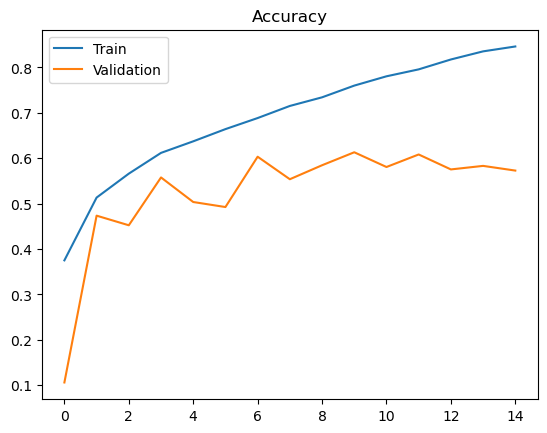

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='Train')
plt.plot(history.history['val_acc'], label='Validation')
plt.title('Accuracy')
plt.legend()
plt.show()

In [32]:
import numpy as np
from sklearn.metrics import classification_report

result = model.predict(X_test)
print(classification_report(np.argmax(y_test, axis=-1), np.argmax(result, axis=-1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
              precision    recall  f1-score   support

           0       0.55      0.71      0.62      1000
           1       0.63      0.61      0.62      1000
           2       0.46      0.52      0.49      1000
           3       0.43      0.40      0.41      1000
           4       0.52      0.54      0.53      1000
           5       0.68      0.21      0.32      1000
           6       0.76      0.63      0.69      1000
           7       0.71      0.50      0.59      1000
           8       0.56      0.83      0.66      1000
           9       0.55      0.74      0.63      1000

    accuracy                           0.57     10000
   macro avg       0.59      0.57      0.56     10000
weighted avg       0.59      0.57      0.56     10000



In [33]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

9708
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
예측 결과 : truck
실제 결과 : truck


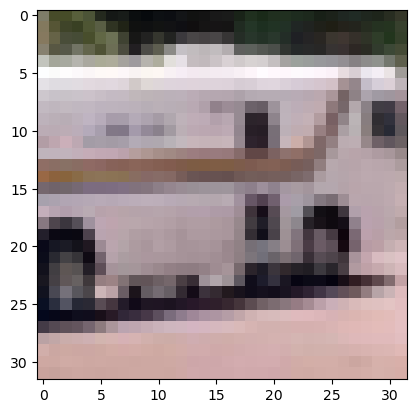

airplane : 0.03 %
automobile : 0.93 %
bird : 0.01 %
cat : 0.02 %
deer : 0.0 %
dog : 0.0 %
frog : 0.0 %
horse : 0.0 %
ship : 0.04 %
truck : 98.96 %


In [82]:
import random
num = random.randint(0,9999)
print(num)

pred = model.predict(np.array([X_test[num]]))

print("예측 결과 :", labels[pred.argmax()])
print("실제 결과 :", labels[y_test[num].argmax()])
plt.imshow(X_test[num])
plt.show()

for i, pro in enumerate(pred[0]):
    print(labels[i], ':', round(pro * 100, 2), '%')

In [ ]:
## flickr 이미지 분류

In [83]:
pip install flickrapi

Note: you may need to restart the kernel to use updated packages.


In [141]:
from flickrapi import FlickrAPI

In [142]:
key = "047b00ff12d42f30e544835b568894f9"
secret = "3d016cd6b339e746"

In [143]:
flickr = FlickrAPI(key, secret, format='parsed-json')

In [144]:
search = flickr.photos.search(text='panda', per_page=100, media='photos', sort='relevance', safe_search=1, extras='url_q, license', accuracy=10)

In [145]:
search

{'photos': {'page': 1,
  'pages': 2958,
  'perpage': 100,
  'total': 295770,
  'photo': [{'id': '25933765604',
    'owner': '91501748@N07',
    'secret': '72f26ddaf9',
    'server': '1553',
    'farm': 2,
    'title': 'panda',
    'ispublic': 1,
    'isfriend': 0,
    'isfamily': 0,
    'license': '9',
    'url_q': 'https://live.staticflickr.com/1553/25933765604_72f26ddaf9_q.jpg',
    'height_q': 150,
    'width_q': 150},
   {'id': '27030190431',
    'owner': '91501748@N07',
    'secret': '659a71302e',
    'server': '7359',
    'farm': 8,
    'title': 'panda',
    'ispublic': 1,
    'isfriend': 0,
    'isfamily': 0,
    'license': '9',
    'url_q': 'https://live.staticflickr.com/7359/27030190431_659a71302e_q.jpg',
    'height_q': 150,
    'width_q': 150},
   {'id': '3523841322',
    'owner': '15494900@N06',
    'secret': '8e13c3e5fb',
    'server': '3408',
    'farm': 4,
    'title': 'Panda',
    'ispublic': 1,
    'isfriend': 0,
    'isfamily': 0,
    'license': '0',
    'url_q': 'htt

In [146]:
photos = search['photos']

In [147]:
photos['photo'][0]

{'id': '25933765604',
 'owner': '91501748@N07',
 'secret': '72f26ddaf9',
 'server': '1553',
 'farm': 2,
 'title': 'panda',
 'ispublic': 1,
 'isfriend': 0,
 'isfamily': 0,
 'license': '9',
 'url_q': 'https://live.staticflickr.com/1553/25933765604_72f26ddaf9_q.jpg',
 'height_q': 150,
 'width_q': 150}

In [148]:
from urllib.request import urlretrieve
import os, time, sys

## 폴더가 존재하는지 확인하고 폴더가 존재하지 않을 경우 폴더를 생성
if not os.path.exists('Panda'):
    os.mkdir('Panda')

## search에서 받은 url을 가지고 지정된 폴더에 이미지 저장하기
try:
    for i, photo in enumerate(photos['photo']):
        url_q = photo['url_q']
        filepath = 'Pandas/' + 'panda' + str(i) + '.jpg'
        if os.path.exists(filepath):
            continue
        print(str(i+1)+'download=', url_q)
        urlretrieve(url_q, filepath)
        time.sleep(0.5)
except:
    # 예외가 발생한 시점부터 호출 스택을 거슬러 올라가며 각 호출 프레임에서 예외 정보를 추적(traceback)하여 제공
    import traceback
    # 예외 정보를 콘솔에 출력하는 출력문
    traceback.print_exc()

1download= https://live.staticflickr.com/1553/25933765604_72f26ddaf9_q.jpg


Traceback (most recent call last):
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_13032\2735168549.py", line 16, in <module>
    urlretrieve(url_q, filepath)
  File "C:\ProgramData\anaconda3\Lib\urllib\request.py", line 251, in urlretrieve
    tfp = open(filename, 'wb')
          ^^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: 'Pandas/panda0.jpg'


In [149]:
search = flickr.photos.search(text='dolphin', per_page=100, media='photos', sort='relevance', safe_search=1, extras='url_q, license', accuracy=10)

In [150]:
photos = search['photos']

In [25]:
from urllib.request import urlretrieve
import os, time, sys

## 폴더가 존재하는지 확인하고 폴더가 존재하지 않을 경우 폴더를 생성
if not os.path.exists('Dolphin'):
    os.mkdir('Dolphin')

## search에서 받은 url을 가지고 지정된 폴더에 이미지 저장하기
try:
    for i, photo in enumerate(photos['photo']):
        url_q = photo['url_q']
        filepath = 'Dolphin/' + 'dolphin' + str(i) + '.jpg'
        # if os.path.exists(filepath):
        #     continue
        print(str(i+1)+'download=', url_q)
        urlretrieve(url_q, filepath)
        time.sleep(0.5)
except:
    # 예외가 발생한 시점부터 호출 스택을 거슬러 올라가며 각 호출 프레임에서 예외 정보를 추적(traceback)하여 제공
    import traceback
    # 예외 정보를 콘솔에 출력하는 출력문
    traceback.print_exc()

1download= https://live.staticflickr.com/7521/15751761376_1fa5dc3c22_q.jpg
2download= https://live.staticflickr.com/2100/2499828984_6c6bab0262_q.jpg
3download= https://live.staticflickr.com/5205/5357211660_6f5bd5fbb8_q.jpg
4download= https://live.staticflickr.com/5218/5483821250_bc46afb072_q.jpg
5download= https://live.staticflickr.com/1342/5142045955_dd3e60fef8_q.jpg
6download= https://live.staticflickr.com/2443/3776180171_7e03978936_q.jpg
7download= https://live.staticflickr.com/3695/9673646434_d65ff8c022_q.jpg
8download= https://live.staticflickr.com/93/268131917_0c0e94e6b8_q.jpg
9download= https://live.staticflickr.com/4036/4480463330_55da6b83a8_q.jpg
10download= https://live.staticflickr.com/3049/2977122762_6a7fe2220b_q.jpg
11download= https://live.staticflickr.com/1132/1105085162_32e3bb6d31_q.jpg
12download= https://live.staticflickr.com/2663/4079125332_e65b725d72_q.jpg
13download= https://live.staticflickr.com/5049/5342144654_fced18f1b1_q.jpg
14download= https://live.staticflick

In [151]:
def make_img(search_word):
    search = flickr.photos.search(text=search_word, per_page=100, media='photos', sort='relevance', safe_search=1, extras='url_q, license', accuracy=10)
    photos = search['photos']

    from urllib.request import urlretrieve
    import os, time, sys
    
    ## 폴더가 존재하는지 확인하고 폴더가 존재하지 않을 경우 폴더를 생성
    path_name=search_word[0].upper() + search_word[1:]
    if not os.path.exists(path_name):
        os.mkdir(path_name)
    
    ## search에서 받은 url을 가지고 지정된 폴더에 이미지 저장하기
    try:
        for i, photo in enumerate(photos['photo']):
            url_q = photo['url_q']
            filepath = path_name + '/' + path_name.lower() + str(i) + '.jpg'
            # if os.path.exists(filepath):
            #     continue
            print(str(i+1)+'download=', url_q)
            urlretrieve(url_q, filepath)
            time.sleep(0.5)
    except:
        # 예외가 발생한 시점부터 호출 스택을 거슬러 올라가며 각 호출 프레임에서 예외 정보를 추적(traceback)하여 제공
        import traceback
        # 예외 정보를 콘솔에 출력하는 출력문
        traceback.print_exc()

In [ ]:
make_img('eagle')

1download= https://live.staticflickr.com/1324/4732615041_1ce3c3cefb_q.jpg
2download= https://live.staticflickr.com/418/32127128056_0b40450920_q.jpg
3download= https://live.staticflickr.com/3/2719827_481a476380_q.jpg
4download= https://live.staticflickr.com/7231/6969328242_02e6fde4a2_q.jpg
5download= https://live.staticflickr.com/3946/15399146127_6d64cf820b_q.jpg
6download= https://live.staticflickr.com/4833/46681874542_f913069d3f_q.jpg
7download= https://live.staticflickr.com/3404/3611384870_52b0c278a1_q.jpg
8download= https://live.staticflickr.com/2190/1907581524_79afb10ec4_q.jpg
9download= https://live.staticflickr.com/5004/5256563560_2433a9caa3_q.jpg
10download= https://live.staticflickr.com/7657/16916519950_8b7fc99dae_q.jpg
11download= https://live.staticflickr.com/3215/3046446820_55d656fca8_q.jpg
12download= https://live.staticflickr.com/7122/7882946116_9e46202ff4_q.jpg
13download= https://live.staticflickr.com/4074/4829055553_82c3e39fc9_q.jpg
14download= https://live.staticflickr

In [32]:
make_img('tiger')

1download= https://live.staticflickr.com/1523/26212985061_e37224ba29_q.jpg
2download= https://live.staticflickr.com/3160/3279605003_48a7c92084_q.jpg
3download= https://live.staticflickr.com/657/21775720712_b187a836d4_q.jpg
4download= https://live.staticflickr.com/8197/8216091909_4e04272073_q.jpg
5download= https://live.staticflickr.com/2393/2529423637_2b51cc7d85_q.jpg
6download= https://live.staticflickr.com/4043/4652775075_cb9ef87b12_q.jpg
7download= https://live.staticflickr.com/3921/14389915480_124382e917_q.jpg
8download= https://live.staticflickr.com/8616/16107804578_9c330ac58b_q.jpg
9download= https://live.staticflickr.com/4041/5159256935_6d65db4d81_q.jpg
10download= https://live.staticflickr.com/5303/5674808668_c8af0b3c86_q.jpg
11download= https://live.staticflickr.com/72/202636473_28f56d7254_q.jpg
12download= https://live.staticflickr.com/2902/13996978431_df61ddabda_q.jpg
13download= https://live.staticflickr.com/3105/2789810706_fab14bab7e_q.jpg
14download= https://live.staticfl

In [33]:
make_img('wolf')

1download= https://live.staticflickr.com/700/20830465459_fda61f8efc_q.jpg
2download= https://live.staticflickr.com/8149/7589238764_1716e4a82b_q.jpg
3download= https://live.staticflickr.com/5223/5632555171_cb2a23db9a_q.jpg
4download= https://live.staticflickr.com/7447/11947023844_389a609712_q.jpg
5download= https://live.staticflickr.com/4227/34870174156_de93691469_q.jpg
6download= https://live.staticflickr.com/5478/10894408424_1c69683539_q.jpg
7download= https://live.staticflickr.com/2760/4530918051_7bf2cdb807_q.jpg
8download= https://live.staticflickr.com/4048/4665966352_f2eda1680e_q.jpg
9download= https://live.staticflickr.com/7492/16127151567_2c4651f9d5_q.jpg
10download= https://live.staticflickr.com/3295/2708569540_38fbf11265_q.jpg
11download= https://live.staticflickr.com/6194/6039745661_cf52c91b08_q.jpg
12download= https://live.staticflickr.com/3391/3639746263_6a37ed8f5e_q.jpg
13download= https://live.staticflickr.com/599/21836418038_4cbf9e9777_q.jpg
14download= https://live.stati

In [34]:
make_img('cow')

1download= https://live.staticflickr.com/7059/26974398835_6f24a1e159_q.jpg
2download= https://live.staticflickr.com/4371/37395978615_24e4fbd54e_q.jpg
3download= https://live.staticflickr.com/2503/4000109142_b3ddb811a2_q.jpg
4download= https://live.staticflickr.com/8469/8102610926_7c2fdb16c5_q.jpg
5download= https://live.staticflickr.com/6211/6258240517_a685450c0f_q.jpg
6download= https://live.staticflickr.com/8311/8027168255_394a5849bc_q.jpg
7download= https://live.staticflickr.com/2673/5752819834_e84698cdf2_q.jpg
8download= https://live.staticflickr.com/6020/6019935428_837de0bd39_q.jpg
9download= https://live.staticflickr.com/1233/5102842242_e8971025aa_q.jpg
10download= https://live.staticflickr.com/846/29327024278_f0bba5e894_q.jpg
11download= https://live.staticflickr.com/41/97286509_3fdb3b38bb_q.jpg
12download= https://live.staticflickr.com/8666/15672598369_bcb33f1f29_q.jpg
13download= https://live.staticflickr.com/93/245857494_1d680116a9_q.jpg
14download= https://live.staticflickr.

In [35]:
make_img('rabbit')

1download= https://live.staticflickr.com/3315/3520097219_ca9efec57a_q.jpg
2download= https://live.staticflickr.com/3089/2675344021_443093615b_q.jpg
3download= https://live.staticflickr.com/3584/3520910820_79c5fdaffc_q.jpg
4download= https://live.staticflickr.com/3137/2645826110_3467564fd3_q.jpg
5download= https://live.staticflickr.com/4068/4674351232_cbedca88d2_q.jpg
6download= https://live.staticflickr.com/2438/3821157141_15020b3f65_q.jpg
7download= https://live.staticflickr.com/5322/7376464978_e8f5570fa3_q.jpg
8download= https://live.staticflickr.com/4810/45839575782_e6dda11b79_q.jpg
9download= https://live.staticflickr.com/2487/3706445364_5fcb625894_q.jpg
10download= https://live.staticflickr.com/188/395918237_4ed297da26_q.jpg
11download= https://live.staticflickr.com/3056/2642333511_d2639c7712_q.jpg
12download= https://live.staticflickr.com/2673/3715017837_b53d1070bb_q.jpg
13download= https://live.staticflickr.com/8154/7681254568_e6d5e28e5d_q.jpg
14download= https://live.staticflic

In [37]:
make_img('mushroom')

1download= https://live.staticflickr.com/7368/9509342940_d3821dca56_q.jpg
2download= https://live.staticflickr.com/714/21545169238_796a006e46_q.jpg
3download= https://live.staticflickr.com/1408/846238617_97291a900b_q.jpg
4download= https://live.staticflickr.com/1597/24350748260_79bb257ed6_q.jpg
5download= https://live.staticflickr.com/6165/6181478475_10164bb72b_q.jpg
6download= https://live.staticflickr.com/7152/6852319357_324df0fb88_q.jpg
7download= https://live.staticflickr.com/8195/29359074785_d9567082ce_q.jpg
8download= https://live.staticflickr.com/5684/21574137109_f1b537ce9a_q.jpg
9download= https://live.staticflickr.com/3316/3607099094_eed0cd0fed_q.jpg
10download= https://live.staticflickr.com/1256/897666596_34a809f30c_q.jpg
11download= https://live.staticflickr.com/7302/9405843789_b1b0d2c295_q.jpg
12download= https://live.staticflickr.com/4090/4961199453_557599aa0b_q.jpg
13download= https://live.staticflickr.com/5647/30773281961_a2983bf1be_q.jpg
14download= https://live.staticf

In [39]:
make_img('lion')

1download= https://live.staticflickr.com/2800/4203199462_c1ba188403_q.jpg
2download= https://live.staticflickr.com/1609/26260010225_c25241c989_q.jpg
3download= https://live.staticflickr.com/4127/4976834857_ecb2ba3147_q.jpg
4download= https://live.staticflickr.com/4149/4976834319_9ce6e6e24a_q.jpg
5download= https://live.staticflickr.com/3646/3330877545_754ac05275_q.jpg
6download= https://live.staticflickr.com/3610/3322556687_8ba643f1e4_q.jpg
7download= https://live.staticflickr.com/4110/4977446630_2584150a22_q.jpg
8download= https://live.staticflickr.com/8894/27964617993_d92de21631_q.jpg
9download= https://live.staticflickr.com/4088/5188413866_245ccb6411_q.jpg
10download= https://live.staticflickr.com/3942/33333220506_3be7579fa8_q.jpg
11download= https://live.staticflickr.com/7593/27302208532_7ff5555c91_q.jpg
12download= https://live.staticflickr.com/36/109565353_514df42f06_q.jpg
13download= https://live.staticflickr.com/3402/3331725264_0921ab5b48_q.jpg
14download= https://live.staticfl

In [41]:
make_img('turtle')

1download= https://live.staticflickr.com/5275/7380287552_57c528f17e_q.jpg
2download= https://live.staticflickr.com/5081/5256352234_b893ef7d40_q.jpg
3download= https://live.staticflickr.com/1395/533436406_e868442e4c_q.jpg
4download= https://live.staticflickr.com/5464/8892048635_1feb0cce37_q.jpg
5download= https://live.staticflickr.com/2828/9578211470_c2e2a8c025_q.jpg
6download= https://live.staticflickr.com/169/384447781_c811dbf520_q.jpg
7download= https://live.staticflickr.com/2345/2327713821_3a4736ddda_q.jpg
8download= https://live.staticflickr.com/7460/8874277779_cbf4d155d1_q.jpg
9download= https://live.staticflickr.com/3396/3266329532_6867b1d9be_q.jpg
10download= https://live.staticflickr.com/5333/6926624026_55c54c456c_q.jpg
11download= https://live.staticflickr.com/3282/2987913112_338eb16954_q.jpg
12download= https://live.staticflickr.com/4062/4292710309_991c8dcf59_q.jpg
13download= https://live.staticflickr.com/3406/3223383593_19c9a28bf2_q.jpg
14download= https://live.staticflickr

In [ ]:
make_img('dolphin')

In [ ]:
make_img('panda')

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout, AveragePooling2D
from tensorflow.keras.regularizers import l2

In [3]:
model = Sequential(name='AlexNet')
# 1st layer(conv+pool+batchnorm)
model.add(Conv2D(filters=96, kernel_size=(3,3), strides=(4,4), 
                 padding='valid', activation='relu',
                 kernel_regularizer=l2(0.0005),
                 input_shape=(75,75,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'))
model.add(BatchNormalization())


# 2nd layer(conv+pool+batchnorm)
model.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same', 
                 activation='relu', kernel_regularizer=l2(0.0005)))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(BatchNormalization())


# 3rd layer(conv+Batchnorm)
model.add(Conv2D(384, kernel_size=(3,3), strides=(1,1), padding='same', 
                 activation='relu', kernel_regularizer=l2(0.0005)))
model.add(BatchNormalization())


# 4rd layer(conv+Batchnorm)
model.add(Conv2D(384, kernel_size=(3,3), strides=(1,1), padding='same', 
                 activation='relu', kernel_regularizer=l2(0.0005)))
model.add(BatchNormalization())

# 5rd layer(conv + Batchnorm + pool)
model.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same', 
                 activation='relu', kernel_regularizer=l2(0.0005)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))

## DNN
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['acc'])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [4]:
import os
import cv2
import numpy as np

image_arr = []
label_arr = []

dir_path = 'images/'
for i, dir in enumerate(os.listdir(dir_path)):
    img_path = os.listdir(dir_path + dir)
    for img in img_path:
        img_ = cv2.imread(dir_path + dir + '/' + img)
        img_arr = cv2.resize(img_, (75, 75), interpolation=cv2.INTER_AREA)
        image_arr.append(img_arr)
        label_arr.append(i)

In [5]:
len(image_arr) # 이미지 받은 거

994

In [6]:
np.unique(label_arr)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
image_arr = np.array(image_arr)
label_arr = np.array(label_arr)

In [8]:
# 트레인 데이터, 테스트 데이터 분리
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(image_arr, 
                                                        label_arr, 
                                                        test_size=0.3,
                                                        random_state=2)

In [9]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(695, 75, 75, 3) (299, 75, 75, 3)
(695,) (299,)


In [10]:
import numpy as np
from tensorflow.keras.utils import to_categorical

X_train = X_train/255
X_test = X_test/255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
import datetime
import tensorflow as tf

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [12]:
history = model.fit(X_train, y_train,
                    callbacks=[tensorboard_callback],
                    epochs=100,
                    validation_split = 0.3)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 526ms/step - acc: 0.1555 - loss: 7.3895 - val_acc: 0.1292 - val_loss: 2.8952
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 501ms/step - acc: 0.2836 - loss: 3.3420 - val_acc: 0.0909 - val_loss: 2.9909
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 491ms/step - acc: 0.3758 - loss: 2.9480 - val_acc: 0.1292 - val_loss: 3.4001
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 492ms/step - acc: 0.3753 - loss: 2.8841 - val_acc: 0.0909 - val_loss: 5.2640
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 490ms/step - acc: 0.4911 - loss: 2.2138 - val_acc: 0.0909 - val_loss: 3.9171
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 490ms/step - acc: 0.5082 - loss: 2.1213 - val_acc: 0.0957 - val_loss: 4.5234
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 491ms/step - acc: 0.6088 - loss: 1.8548 - val_acc: 0.1483 - val_loss: 3.3705
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 491ms/step - acc: 0.5810 - loss: 1.8392 - val_acc: 0.2010 - val_loss: 3.8459
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 493ms

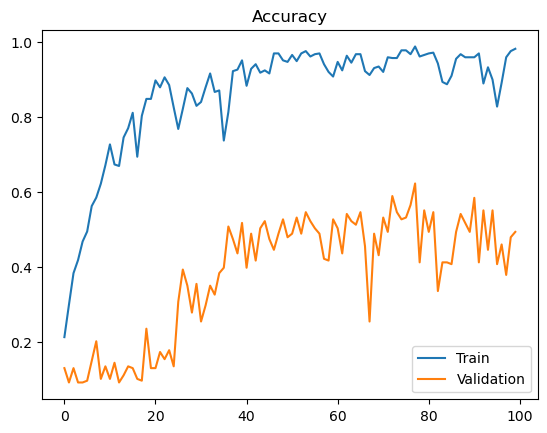

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='Train')
plt.plot(history.history['val_acc'], label='Validation')
plt.title('Accuracy')
plt.legend()
plt.show()

In [14]:
import numpy as np
from sklearn.metrics import classification_report

result = model.predict(X_test)
print(classification_report(np.argmax(y_test, axis=-1), np.argmax(result, axis=-1)))

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
              precision    recall  f1-score   support

           0       0.35      0.68      0.46        25
           1       0.95      0.66      0.78        29
           2       0.56      0.65      0.60        37
           3       0.50      0.12      0.19        25
           4       0.42      0.73      0.53        30
           5       0.88      0.48      0.62        29
           6       0.51      0.66      0.58        29
           7       0.46      0.61      0.52        28
           8       0.47      0.47      0.47        36
           9       0.50      0.03      0.06        31

    accuracy                           0.51       299
   macro avg       0.56      0.51      0.48       299
weighted avg       0.56      0.51      0.49       299



In [15]:
texts = ['Cow', 'Dolphin', 'Eagle', 'Lion', 'Mushroom', 'Panda', 'Rabbit', 'Tiger', 'Turtle', 'Wolf']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
예측 결과 : Tiger
실제 결과 : Tiger


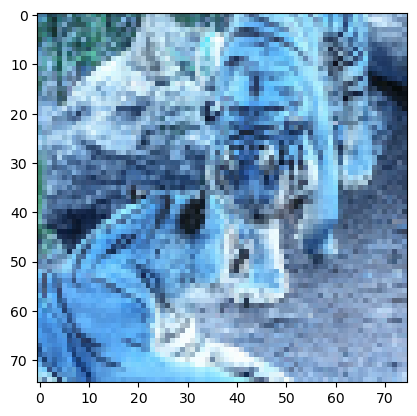

Cow : 0.0 %
Dolphin : 0.0 %
Eagle : 0.0 %
Lion : 0.0 %
Mushroom : 0.0 %
Panda : 0.0 %
Rabbit : 0.0 %
Tiger : 99.98 %
Turtle : 0.02 %
Wolf : 0.0 %


In [41]:
import random
num = random.randint(0,294)

pred = model.predict(np.array([X_test[num]]))

print("예측 결과 :", texts[pred.argmax()])
print("실제 결과 :", texts[y_test[num].argmax()])
plt.imshow(X_test[num])
plt.show()

for i, pro in enumerate(pred[0]):
    print(texts[i], ':', round(pro * 100, 2), '%')

In [41]:
# %tensorboard --logdir logs/fit

CNN 모델 

In [42]:
# 트레인 데이터, 테스트 데이터 분리
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.utils import to_categorical
import datetime
import tensorflow as tf

(X_train, X_test, y_train, y_test) = train_test_split(image_arr, 
                                                        label_arr, 
                                                        test_size=0.3,
                                                        random_state=2)

X_train = X_train/255
X_test = X_test/255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [43]:
# CNN 모델
CNN_model = Sequential()
CNN_model.add(Conv2D(64, kernel_size=(3,3), activation='relu', 
                     input_shape=(75,75,3), padding='same', strides=(1,1)))
# pool_size가 2,2인 것은 사이즈를 반으로 줄이겠다는 뜻
CNN_model.add(MaxPool2D(pool_size=(2,2)))
# padding 중 valid는 안 쓴다는 것
CNN_model.add(Conv2D(32, kernel_size=(5,5), activation='relu', 
                     padding='valid', strides=(1,1)))
CNN_model.add(MaxPool2D(pool_size=(2,2)))
CNN_model.add(Dropout(0.5))
CNN_model.add(Flatten())
CNN_model.add(Dense(128, activation='relu'))
CNN_model.add(Dropout(0.5))
CNN_model.add(Dense(64, activation='relu'))
CNN_model.add(Dropout(0.5))
CNN_model.add(Dense(32, activation='relu'))
CNN_model.add(Dense(10, activation='softmax'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [44]:
CNN_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['acc'])

In [45]:
CNN_history = CNN_model.fit(X_train, y_train, epochs=100,
                            batch_size=128,
                            validation_split=0.3)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 335ms/step - acc: 0.1105 - loss: 2.3052 - val_acc: 0.1483 - val_loss: 2.2586
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step - acc: 0.1788 - loss: 2.2208 - val_acc: 0.1770 - val_loss: 2.2036
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step - acc: 0.1874 - loss: 2.1448 - val_acc: 0.1531 - val_loss: 2.1599
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 294ms/step - acc: 0.2044 - loss: 2.1215 - val_acc: 0.1579 - val_loss: 2.1623
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step - acc: 0.2179 - loss: 2.0915 - val_acc: 0.1531 - val_loss: 2.1370
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step - acc: 0.1908 - loss: 2.1119 - val_acc: 0.1483 - val_loss: 2.1403
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step - acc: 0.2144 - loss: 2.0551 - val_acc: 0.1483 - val_loss: 2.1886
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 289ms/step - acc: 0.2142 - loss: 2.1028 - val_acc: 0.1483 - val_loss: 2.1109
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 283ms/step - acc: 0.2038

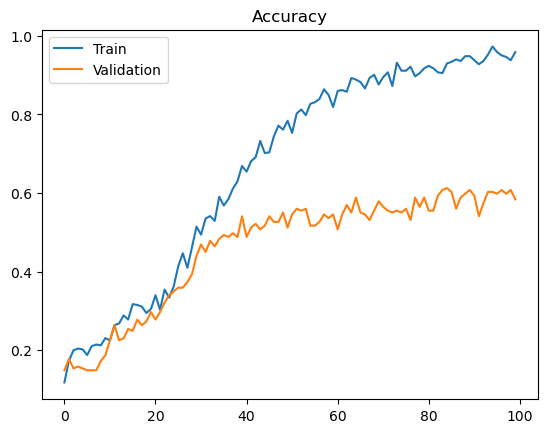

In [46]:
import matplotlib.pyplot as plt

plt.plot(CNN_history.history['acc'], label='Train')
plt.plot(CNN_history.history['val_acc'], label='Validation')
plt.title('Accuracy')
plt.legend()
plt.show()

In [47]:
import numpy as np
from sklearn.metrics import classification_report

result = CNN_model.predict(X_test)
print(classification_report(np.argmax(y_test, axis=-1), np.argmax(result, axis=-1)))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
              precision    recall  f1-score   support

           0       0.40      0.56      0.47        25
           1       0.89      0.83      0.86        29
           2       0.67      0.49      0.56        37
           3       0.34      0.68      0.45        25
           4       0.58      0.50      0.54        30
           5       0.62      0.62      0.62        29
           6       0.67      0.62      0.64        29
           7       0.76      0.46      0.58        28
           8       0.63      0.53      0.58        36
           9       0.48      0.48      0.48        31

    accuracy                           0.57       299
   macro avg       0.60      0.58      0.58       299
weighted avg       0.61      0.57      0.58       299



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
예측 결과 : Eagle
실제 결과 : Eagle


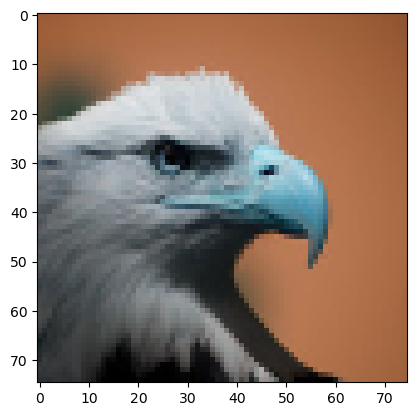

Cow : 0.0 %
Dolphin : 2.26 %
Eagle : 97.69 %
Lion : 0.0 %
Mushroom : 0.0 %
Panda : 0.0 %
Rabbit : 0.0 %
Tiger : 0.0 %
Turtle : 0.03 %
Wolf : 0.01 %


In [57]:
import random
num = random.randint(0,294)

pred = CNN_model.predict(np.array([X_test[num]]))

print("예측 결과 :", texts[pred.argmax()])
print("실제 결과 :", texts[y_test[num].argmax()])
plt.imshow(X_test[num])
plt.show()

for i, pro in enumerate(pred[0]):
    print(texts[i], ':', round(pro * 100, 2), '%')

DNN 모델

In [58]:
# 트레인 데이터, 테스트 데이터 분리
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.utils import to_categorical
import datetime
import tensorflow as tf

(X_train, X_test, y_train, y_test) = train_test_split(image_arr, 
                                                        label_arr, 
                                                        test_size=0.3,
                                                        random_state=2)

X_train = X_train/255
X_test = X_test/255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [59]:
# DNN
DNN_model = Sequential([
    Flatten(input_shape=(75,75,3)),
    Dense(128, activation='relu'),
    Dropout(0.5),  # 추가된 Dropout 레이어
    Dense(64, activation='relu'),
    Dropout(0.3),  # 추가된 Dropout 레이어
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax'),
])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [60]:
DNN_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['acc'])

In [61]:
DNN_history = DNN_model.fit(X_train, y_train, epochs=100,
                            batch_size=128,
                            validation_split=0.3)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - acc: 0.1124 - loss: 3.6619 - val_acc: 0.1148 - val_loss: 2.4894
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - acc: 0.1079 - loss: 3.1936 - val_acc: 0.0670 - val_loss: 2.3238
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.1268 - loss: 2.5226 - val_acc: 0.1005 - val_loss: 2.3233
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.0969 - loss: 2.3735 - val_acc: 0.1053 - val_loss: 2.3022
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.1088 - loss: 2.2993 - val_acc: 0.0622 - val_loss: 2.3030
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.0945 - loss: 2.2987 - val_acc: 0.1244 - val_loss: 2.2995
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.1113 - loss: 2.2986 - val_acc: 0.1244 - val_loss: 2.2972
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.1115 - loss: 2.3004 - val_acc: 0.1005 - val_loss: 2.2959
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.0992 - loss: 

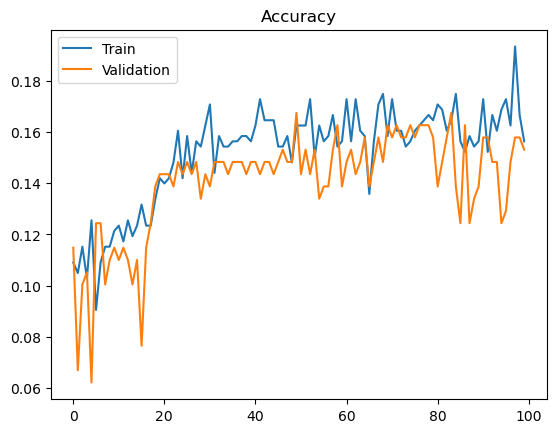

In [62]:
import matplotlib.pyplot as plt

plt.plot(DNN_history.history['acc'], label='Train')
plt.plot(DNN_history.history['val_acc'], label='Validation')
plt.title('Accuracy')
plt.legend()
plt.show()

In [63]:
import numpy as np
from sklearn.metrics import classification_report

result = DNN_model.predict(X_test)
print(classification_report(np.argmax(y_test, axis=-1), np.argmax(result, axis=-1)))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.55      0.72      0.63        29
           2       0.28      0.30      0.29        37
           3       0.11      1.00      0.21        25
           4       0.00      0.00      0.00        30
           5       0.00      0.00      0.00        29
           6       0.00      0.00      0.00        29
           7       0.00      0.00      0.00        28
           8       0.67      0.06      0.10        36
           9       0.00      0.00      0.00        31

    accuracy                           0.20       299
   macro avg       0.16      0.21      0.12       299
weighted avg       0.18      0.20      0.13       299



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
예측 결과 : Lion
실제 결과 : Lion


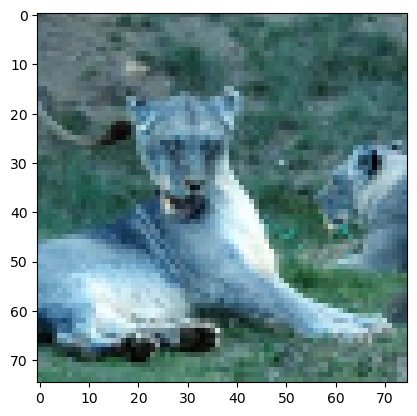

Cow : 11.78 %
Dolphin : 6.95 %
Eagle : 8.0 %
Lion : 12.17 %
Mushroom : 10.53 %
Panda : 9.74 %
Rabbit : 11.97 %
Tiger : 9.98 %
Turtle : 9.35 %
Wolf : 9.52 %


In [69]:
import random
num = random.randint(0,294)

pred = DNN_model.predict(np.array([X_test[num]]))

print("예측 결과 :", texts[pred.argmax()])
print("실제 결과 :", texts[y_test[num].argmax()])
plt.imshow(X_test[num])
plt.show()

for i, pro in enumerate(pred[0]):
    print(texts[i], ':', round(pro * 100, 2), '%')